# Context 

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs. [IBM Sample Data Sets (kaggle)](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

# Load Libararies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Load Data 

In [3]:
from pathlib import Path

In [4]:
current_dir = Path('.').resolve()

In [5]:
file_path = current_dir / 'data/04-Telco Customer Churn.csv'

In [6]:
df = pd.read_csv(file_path)

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preparation

## Column Names

In [8]:
df.columns = df.columns.str.lower()

## Categorical Features

In [9]:
categorical_columns = df.dtypes[df.dtypes == 'object'].index

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [10]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


`senirocitizen` is a binary value. `totalcharges` is an object (text) and need to change to a number.

In [12]:
tc = pd.to_numeric(df['totalcharges'], errors='coerce') # If 'coerce', then invalid parsing will be set as NaN.

In [13]:
df[['customerid', 'totalcharges']][tc.isnull()]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [14]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [15]:
df['totalcharges'] = df['totalcharges'].fillna(0)

## Dependent Variable

In [16]:
df['churn']

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In machine learning, we are not interested in yes/no, we are interested in the numbers.

In [17]:
df['churn'] = (df['churn'] == 'yes').astype(int)

# Setting Up the Validation Framework

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [20]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [21]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

It is not a must but you can rest the index of the new data frames.

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

In [24]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# Exploratory Data Anlysis

For **exploratory data analysis**, we will use the **full training dataset**.

In [25]:
df_full_train = df_full_train.reset_index(drop=True)

In [26]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [27]:
df_full_train['churn'].value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [28]:
df_full_train['churn'].value_counts(normalize=True) # Return proportions rather than frequencies

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [29]:
# calculate the churn rate
global_churn = df_full_train['churn'].mean()
round(global_churn, 2)

0.27

In [30]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

Here we are interested in the `seniorcitizen`, `monthlycharges`, and `totalcharges`.

In [31]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [32]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

## One-Hot Encoding

Encode categorical features as a one-hot numeric array.

In [33]:
from sklearn.feature_extraction import DictVectorizer

In [34]:
dv = DictVectorizer(sparse=False)

In [35]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [36]:
X_train = dv.fit_transform(train_dict)

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()

In [39]:
model.fit(X_train, y_train)

/home/siamak/anaconda3/envs/mlops/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')

In [41]:
X_val = dv.transform(val_dict)

In [44]:
y_pred = model.predict_proba(X_val)[:, 1]

In [45]:
churn_decision = (y_pred > 0.5)

In [46]:
(y_val == churn_decision).mean()

0.8034066713981547

# Performance Measure

## Accuracy

In [47]:
len(y_val)

1409

In [48]:
(y_val == churn_decision).sum()

1132

In [49]:
1132 / 1409

0.8034066713981547

In [50]:
(y_val == churn_decision).mean()

0.8034066713981547

Is 80% good or not?

In [54]:
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [60]:
scores = []
for t in thresholds:
    churn_decision = (y_pred > t)
    score = (y_val == churn_decision).mean()
    print(f'{t:.2f} => {score:.3f}')
    scores.append(score)

0.00 => 0.274
0.05 => 0.509
0.10 => 0.591
0.15 => 0.667
0.20 => 0.710
0.25 => 0.739
0.30 => 0.760
0.35 => 0.772
0.40 => 0.785
0.45 => 0.793
0.50 => 0.803
0.55 => 0.801
0.60 => 0.795
0.65 => 0.786
0.70 => 0.765
0.75 => 0.744
0.80 => 0.735
0.85 => 0.726
0.90 => 0.726
0.95 => 0.726
1.00 => 0.726


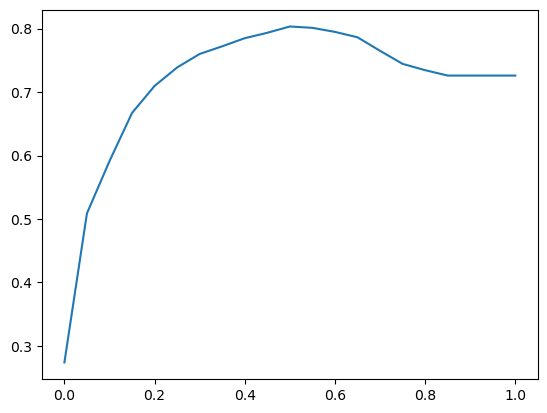

In [61]:
plt.plot(thresholds, scores)
plt.show()

In [62]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

The first and last points on the curve is interesting for us. Threshold 1, techinically means that every customer is treated as non-churning. It means that relax, all is going to be good, nobody is going to churn. Let's not send any promotional email to anyone.

In [67]:
from collections import Counter

In [68]:
Counter(y_pred >= 1)

Counter({False: 1409})

In [69]:
1 - y_val.mean()

0.7260468417317246

In [105]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [108]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [109]:
(y_val == churn_decision.astype(int)).mean()

0.8034066713981547

In [110]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [111]:
df_pred

,probability,prediction,actual
0,0.008993,0,0
1,0.204566,0,0
2,0.212268,0,0
3,0.543056,1,1
4,0.213827,0,0
...,...,...,...
1404,0.313598,0,0
1405,0.039345,0,1
1406,0.136377,0,0
1407,0.799777,1,1


In [112]:
df_pred['correct'] = df_pred['prediction'] == df_pred['actual']

In [113]:
df_pred

,probability,prediction,actual,correct
0,0.008993,0,0,True
1,0.204566,0,0,True
2,0.212268,0,0,True
3,0.543056,1,1,True
4,0.213827,0,0,True
...,...,...,...,...
1404,0.313598,0,0,True
1405,0.039345,0,1,False
1406,0.136377,0,0,True
1407,0.799777,1,1,True


In [114]:
df_pred['correct'].mean()

0.8034066713981547

# Model Interpretation

In [115]:
a = [1, 2, 3, 4]
b = 'abcd'

In [118]:
zip(a, b) # iterator

In [119]:
list(zip(a, b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [120]:
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [122]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [123]:
small = ['contract', 'tenure', 'monthlycharges']

In [125]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [126]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [127]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [128]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [129]:
X_train_small = dv_small.transform(dicts_train_small)

In [130]:
model_small = LogisticRegression()

In [131]:
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [135]:
w0 = model_small.intercept_
w0

array([-2.47677566])

In [136]:
w = model_small.coef_[0]
w

array([ 0.97004491, -0.02513651, -0.94872202,  0.02748236, -0.03618424])

In [137]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [140]:
# bias term is what we assume about the customer without knowing about him
sigmoid(w0)

array([0.07750242])

In [141]:
# the probability of churning if the customer has a month to month contract
sigmoid(w0 + 0.97)

array([0.18141713])

In [147]:
-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036)

-0.3300000000000001

In [148]:
# "_" means that take the output of the last cell and put it as parameter.
sigmoid(_)

0.41824062315816374

# Using the Model

We will train the model using the full train dataset.

In [149]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [150]:
dv = DictVectorizer(sparse=False)

In [151]:
X_full_train = dv.fit_transform(dicts_full_train)

In [152]:
y_full_train = df_full_train['churn'].values

In [153]:
model = LogisticRegression()

In [155]:
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [156]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [157]:
X_test = dv.transform(dicts_test)

In [158]:
y_pred = model.predict_proba(X_test)[:, 1]

In [161]:
churn_decision = (y_pred >= 0.5)

In [162]:
(churn_decision == y_test).mean()

0.815471965933286

In [164]:
# let's take any customer
dicts_test[10]

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [165]:
customer = dicts_test[10]

In [166]:
X_small = dv.transform([customer]) # it should be a list

In [167]:
X_small.shape

(1, 45)

In [169]:
model.predict_proba(X_small)[:, 1] # it has low probability of churning

array([0.4056811])

In [170]:
y_test[10]

0